## Yêu cầu

Để kiểm tra xem khối u, tổn thương trong ngực bệnh nhân có phải là ung thư hay
không, người ta thực hiện phương pháp chọc hút tế bào bằng kim nhỏ (FNA). Tế bào
lấy được sau đó được phân tích dưới kính hiển vi. Bảng dữ liệu6 trong mục tài liệu tham khảo được tính từ hình ảnh dưới kính hiển vi, các thuộc tính trong bảng mô tả các đặc tính của tế bào được phân tích. Sinh viên hãy dùng thuật toán gom cụm để gom nhóm các khối u lành tính (benign) hoặc ác tính (malignant).

## Load and Inspect Data

In [1]:
import pandas as pd

# Define column names as per the problem description
column_names = [
    'ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
    'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]

# Load the dataset
df = pd.read_csv('/content/wdbc.data', header=None, names=column_names)

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
print(df.head())

# Print the DataFrame's concise summary
print("\nDataFrame Info:")
df.info()

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the DataFrame:
         ID Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_w

## Preprocess Data


In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# 1. Tách các cột đặc trưng (tất cả các cột trừ 'ID' và 'Diagnosis') thành một DataFrame mới
X = df.drop(columns=['ID', 'Diagnosis'])

# 2. Tách cột 'Diagnosis' thành một Series mới
y = df['Diagnosis']

# 3. Mã hóa biến mục tiêu y ('M' và 'B') thành dạng số (0 và 1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check for missing values (already confirmed none from df.info(), but good to explicitly state)
if X.isnull().sum().sum() > 0:
    print("Warning: Missing values found in features. Imputation might be necessary.")
else:
    print("No missing values found in features.")

# 4. Chuẩn hóa dữ liệu trong X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame for easier inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 5. Hiển thị 5 hàng đầu tiên của X đã được chuẩn hóa và các giá trị duy nhất của y đã được mã hóa
print("Huỳnh Thị Trúc Lam - 6351071040")
print("\nFirst 5 rows of standardized features (X_scaled_df):")
print(X_scaled_df.head())

print("\nUnique values of encoded target variable (y_encoded):")
print(np.unique(y_encoded))
print(f"Mapping: {list(label_encoder.classes_)} -> {list(range(len(label_encoder.classes_)))}")

No missing values found in features.
Huỳnh Thị Trúc Lam - 6351071040

First 5 rows of standardized features (X_scaled_df):
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011          

## Apply K-Means Clustering


In [6]:
from sklearn.cluster import KMeans

# 1. Instantiate a KMeans object with n_clusters=2 and random_state for reproducibility
kmeans_model = KMeans(n_clusters=2, random_state=42, n_init='auto')

# 2. Fit the K-Means model to the standardized feature data X_scaled
kmeans_model.fit(X_scaled)

# 3. Predict the cluster labels for each data point
kmeans_labels = kmeans_model.predict(X_scaled)

print("Huỳnh Thị Trúc Lam - 6351071040")
print("K-Means clustering applied successfully.")
print(f"First 10 predicted cluster labels: {kmeans_labels[:10]}")
print(f"Unique cluster labels: {np.unique(kmeans_labels)}")

Huỳnh Thị Trúc Lam - 6351071040
K-Means clustering applied successfully.
First 10 predicted cluster labels: [0 0 0 0 0 0 0 0 0 0]
Unique cluster labels: [0 1]


## Evaluate Clustering Performance

In [8]:
from sklearn.metrics import accuracy_score, adjusted_rand_score
import numpy as np

# Map K-Means labels to original 'B' (0) and 'M' (1) labels
# K-Means labels are arbitrary, so we need to find the best mapping.
# Option 1: map cluster 0 to 'B' (0) and cluster 1 to 'M' (1)
mapped_labels_option1 = np.where(kmeans_labels == 0, 0, 1)
accuracy_option1 = accuracy_score(y_encoded, mapped_labels_option1)

# Option 2: map cluster 0 to 'M' (1) and cluster 1 to 'B' (0)
mapped_labels_option2 = np.where(kmeans_labels == 0, 1, 0)
accuracy_option2 = accuracy_score(y_encoded, mapped_labels_option2)

# Choose the mapping that gives higher accuracy
if accuracy_option1 > accuracy_option2:
    best_accuracy = accuracy_option1
    best_mapped_labels = mapped_labels_option1
    print("Best mapping: Cluster 0 -> Benign (0), Cluster 1 -> Malignant (1)")
else:
    best_accuracy = accuracy_option2
    best_mapped_labels = mapped_labels_option2
    print("Best mapping: Cluster 0 -> Malignant (1), Cluster 1 -> Benign (0)")

print("Huỳnh Thị Trúc Lam - 6351071040")

# Calculate accuracy using the best mapping
print(f"\nAccuracy Score: {best_accuracy:.4f}")

# Calculate Adjusted Rand Index
ar_index = adjusted_rand_score(y_encoded, kmeans_labels)
print(f"Adjusted Rand Index: {ar_index:.4f}")

Best mapping: Cluster 0 -> Malignant (1), Cluster 1 -> Benign (0)
Huỳnh Thị Trúc Lam - 6351071040

Accuracy Score: 0.9121
Adjusted Rand Index: 0.6765


## Visualize Clusters

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Instantiate a PCA object to reduce the data to 2 principal components
pca = PCA(n_components=2)

# 3. Apply PCA to the standardized features X_scaled
X_pca = pca.fit_transform(X_scaled)

# 4. Create a DataFrame pca_df from the PCA-transformed data
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# 5. Add the best_mapped_labels (predicted clusters) and y_encoded (true diagnoses) as new columns to pca_df
pca_df['Predicted_Cluster'] = best_mapped_labels
pca_df['True_Diagnosis'] = y_encoded

print("Huỳnh Thị Trúc Lam - 6351071040")
print("PCA applied and DataFrame created successfully.")
print("First 5 rows of PCA DataFrame:")
print(pca_df.head())

Huỳnh Thị Trúc Lam - 6351071040
PCA applied and DataFrame created successfully.
First 5 rows of PCA DataFrame:
        PC1        PC2  Predicted_Cluster  True_Diagnosis
0  9.192837   1.948583                  1               1
1  2.387802  -3.768172                  1               1
2  5.733896  -1.075174                  1               1
3  7.122953  10.275589                  1               1
4  3.935302  -1.948072                  1               1


Huỳnh Thị Trúc Lam - 6351071040


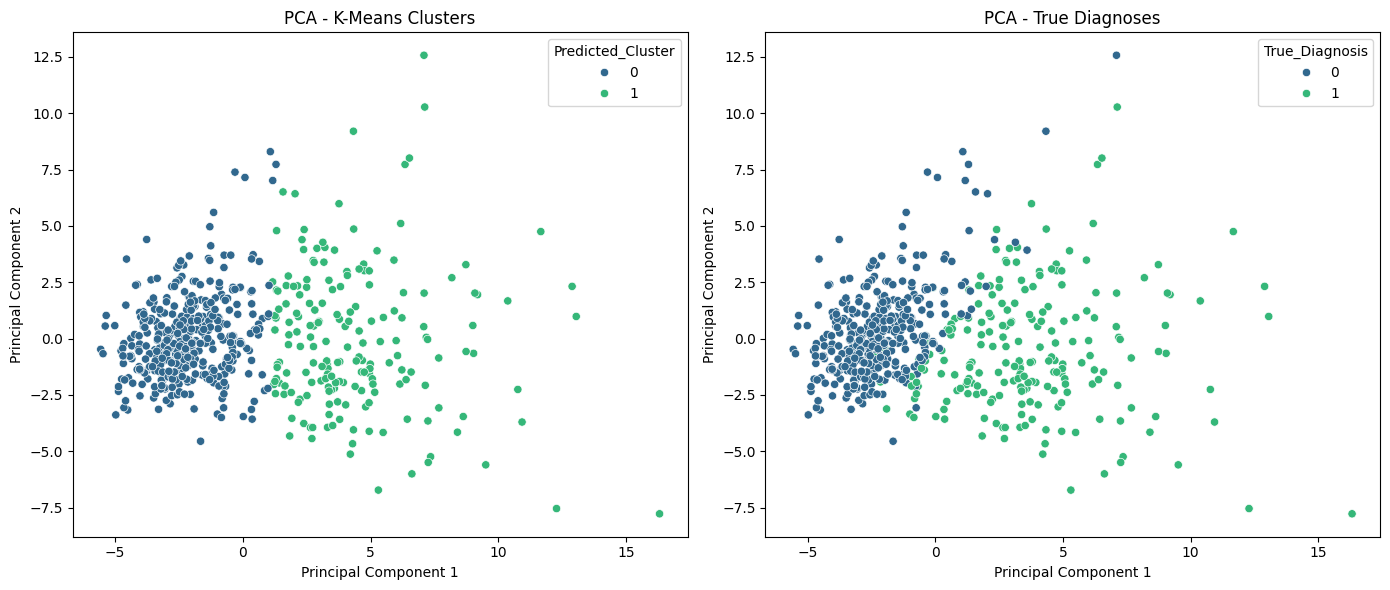

In [11]:
plt.figure(figsize=(14, 6))

# Plot 1: Predicted Clusters
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.scatterplot(x='PC1', y='PC2', hue='Predicted_Cluster', data=pca_df, palette='viridis', legend='full')
plt.title('PCA - K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot 2: True Diagnoses
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.scatterplot(x='PC1', y='PC2', hue='True_Diagnosis', data=pca_df, palette='viridis', legend='full')
plt.title('PCA - True Diagnoses')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
print("Huỳnh Thị Trúc Lam - 6351071040")
plt.show()
